## Lila
Volem que implementeu un model o algoritme que permeti classificar els patrons detectats de la missió groga ️☀️ en el dataset A1. Ens agradaria que mostressiu alguna gràfica de l'entrenament del model (en cas de fer ML) o mètriques qualitatives (accuracy, recall, f1...) i quantitatives (matrius de confusió, ROC curve...).

--

In [41]:
#import libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split

In [42]:
df = pd.read_csv("datasetgroga.csv")
df.head(10)

Unnamed: 0.1  Unnamed: 0                                     paths  c  r  \
0             0           0   DATASET/A1/c1/r1/images/e0/c1r1e0n1.tif  1  1   
1             1           1   DATASET/A1/c1/r1/images/e0/c1r1e0n2.tif  1  1   
2             2           2   DATASET/A1/c1/r1/images/e0/c1r1e0n3.tif  1  1   
3             3           3   DATASET/A1/c1/r1/images/e0/c1r1e0n4.tif  1  1   
4             4           4   DATASET/A1/c1/r1/images/e0/c1r1e0n5.tif  1  1   
5             5           5   DATASET/A1/c1/r1/images/e0/c1r1e0n6.tif  1  1   
6             6           6   DATASET/A1/c1/r1/images/e0/c1r1e0n7.tif  1  1   
7             7           7   DATASET/A1/c1/r1/images/e0/c1r1e0n8.tif  1  1   
8             8           8   DATASET/A1/c1/r1/images/e0/c1r1e0n9.tif  1  1   
9             9           9  DATASET/A1/c1/r1/images/e0/c1r1e0n10.tif  1  1   

   e   n      pattern  patter_idx  
0  0   1  llisa-fosca           0  
1  0   2  llisa-fosca           0  
2  0   3  llisa-fosca           0  
3  0   4  llisa-fosca           0  
4  0   5  llisa-fosca           0  
5  0   6  llisa-fosca           0  
6  0   7  llisa-fosca           0  
7  0   8  llisa-fosca           0  
8  0   9  llisa-fosca           0  
9  0  10  llisa-fosca           0

# First attempt

In [3]:
images_train = []
labels_train = []
images_test = []
labels_test = []
X_train, X_test, y_train, y_test = train_test_split(df, df, test_size=0.33, random_state=42)
for i, row in X_train.iterrows():
    img = cv2.cvtColor(cv2.imread(row["paths"]), cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (224,224)) 
    img = img.flatten()
    images_train.append(img)
    labels_train.append(row["patter_idx"]) #filter first unwanted cols and append

for i, row in X_test.iterrows():
    img = cv2.cvtColor(cv2.imread(row["paths"]), cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (224,224)) 
    img = img.flatten()
    images_test.append(img)
    labels_test.append(row["patter_idx"]) #filter first unwanted cols and append

images_train = np.array(images_train)
images_test = np.array(images_test)
labels_train = np.array(labels_train)
labels_test = np.array(labels_test)

In [ ]:
images_train.shape

In [ ]:
labels_train.shape

In [ ]:
images_test.shape

In [ ]:
labels_test.shape

In [4]:
clfc1r1 = svm.SVC(kernel='linear')
clfc1r1.fit(images_train,labels_train)

SVC(kernel='linear')

In [7]:
clfc1r1.score(images_test, labels_test)

0.548604427333975

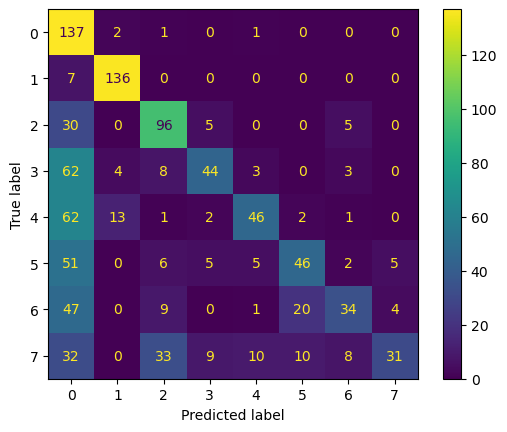

In [8]:
cm = confusion_matrix(labels_test, clfc1r1.predict(images_test), labels=clfc1r1.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clfc1r1.classes_)
disp.plot()

# second attepmt

instead of downsampling the images, just crop a small 100x100 at the top left corner

In [10]:
images_train = []
labels_train = []
images_test = []
labels_test = []
X_train, X_test, y_train, y_test = train_test_split(df, df, test_size=0.33, random_state=42)
for i, row in X_train.iterrows():
    img = cv2.cvtColor(cv2.imread(row["paths"]), cv2.COLOR_BGR2GRAY)
    img = img[:100,:100]
    img = img.flatten()
    images_train.append(img)
    labels_train.append(row["patter_idx"]) #filter first unwanted cols and append

for i, row in X_test.iterrows():
    img = cv2.cvtColor(cv2.imread(row["paths"]), cv2.COLOR_BGR2GRAY)
    img = img[:100,:100]
    img = img.flatten()
    images_test.append(img)
    labels_test.append(row["patter_idx"]) #filter first unwanted cols and append

images_train = np.array(images_train)
images_test = np.array(images_test)
labels_train = np.array(labels_train)
labels_test = np.array(labels_test)

In [11]:
clfc1r1 = svm.SVC(kernel='linear')
clfc1r1.fit(images_train,labels_train)

SVC(kernel='linear')

In [12]:
clfc1r1.score(images_test, labels_test)

0.48604427333974976

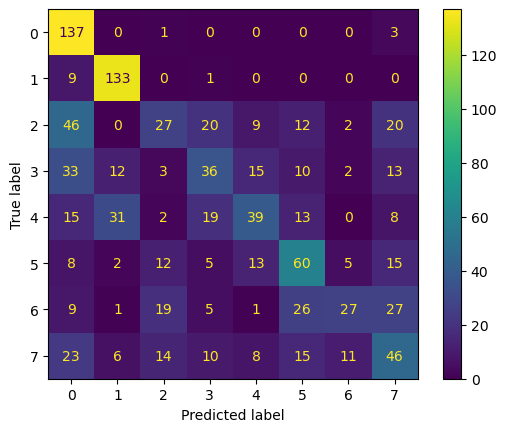

In [13]:
cm = confusion_matrix(labels_test, clfc1r1.predict(images_test), labels=clfc1r1.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clfc1r1.classes_)
disp.plot()

# Third attemp
Before we applied the following k-means approach without any supervised learning and didn't seem to show too many bad results.

Now that we have some data about what each image is we can probably get better results with the same image preprocessing and knn


- K-means:

In [15]:
from sklearn.cluster import KMeans

In [14]:
df = pd.read_csv("A1.csv")
df.head()

Unnamed: 0                                    paths  c  r  e  n
0           0  DATASET/A1/c1/r1/images/e0/c1r1e0n1.tif  1  1  0  1
1           1  DATASET/A1/c1/r1/images/e0/c1r1e0n2.tif  1  1  0  2
2           2  DATASET/A1/c1/r1/images/e0/c1r1e0n3.tif  1  1  0  3
3           3  DATASET/A1/c1/r1/images/e0/c1r1e0n4.tif  1  1  0  4
4           4  DATASET/A1/c1/r1/images/e0/c1r1e0n5.tif  1  1  0  5

Here we crop and convert to binary image using some threshold

In [16]:
WINDOW_SIZE = 300
samples = [] #list where to append vectors, so sample of each image

for im_path in df["paths"]:
    crop = cv2.cvtColor(cv2.imread(im_path)[0:WINDOW_SIZE,0:WINDOW_SIZE], cv2.COLOR_BGR2GRAY) #load image, crop -> window_size -> convert to grayscale 1ch
    #edges = cv2.Canny(crop,40,90)
    (thresh, bin) = cv2.threshold(crop, 170, 180, cv2.THRESH_BINARY)
    samples.append(list(np.asarray(bin).reshape(-1)))

#convert list of lists -> np matrix
samples = np.matrix(samples)

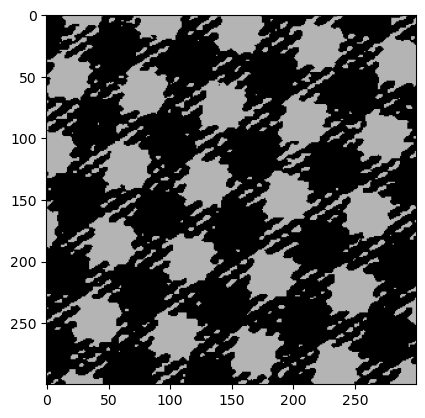

In [39]:
#exmaple of what our binary filter does:
crop = cv2.cvtColor(cv2.imread("DATASET/A1/c3/r1/images/e0/c3r1e0n4.tif")[0:WINDOW_SIZE,0:WINDOW_SIZE], cv2.COLOR_BGR2GRAY)
(thresh, bin) = cv2.threshold(crop, 170, 180, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(bin,cv2.COLOR_GRAY2RGB))

In [17]:
#apply kmeans
NUM_CLUST =5

km = KMeans(n_clusters=NUM_CLUST, max_iter=50, n_init=1, verbose=False)
km.fit(samples)

/Users/josepsmachine/miniforge3/envs/chaos/lib/python3.10/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


KMeans(max_iter=50, n_clusters=5, n_init=1, verbose=False)

In [18]:
#save kmean generated label for each image
df = df.assign(km_label=km.labels_)

In [22]:
df.head()

Unnamed: 0                                    paths  c  r  e  n  km_label
0           0  DATASET/A1/c1/r1/images/e0/c1r1e0n1.tif  1  1  0  1         0
1           1  DATASET/A1/c1/r1/images/e0/c1r1e0n2.tif  1  1  0  2         0
2           2  DATASET/A1/c1/r1/images/e0/c1r1e0n3.tif  1  1  0  3         0
3           3  DATASET/A1/c1/r1/images/e0/c1r1e0n4.tif  1  1  0  4         0
4           4  DATASET/A1/c1/r1/images/e0/c1r1e0n5.tif  1  1  0  5         0

first of all visualize some metrics, histogram of what images classified as what

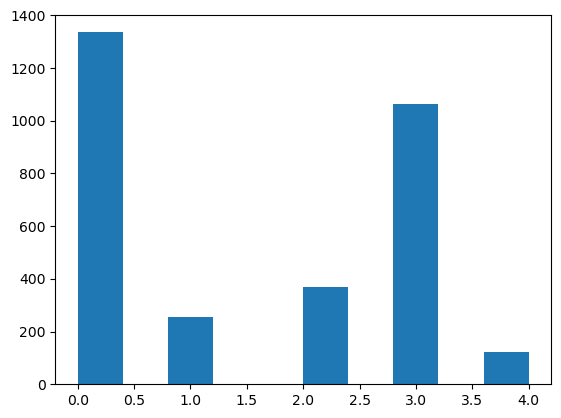

In [32]:
counter = [0]*NUM_CLUST
labels = np.arange(0,NUM_CLUST,dtype=np.uint8)
for i, row in df.iterrows():
    counter[row["km_label"]] += 1

plt.hist(labels,weights = counter)
plt.show()

km_label:  0


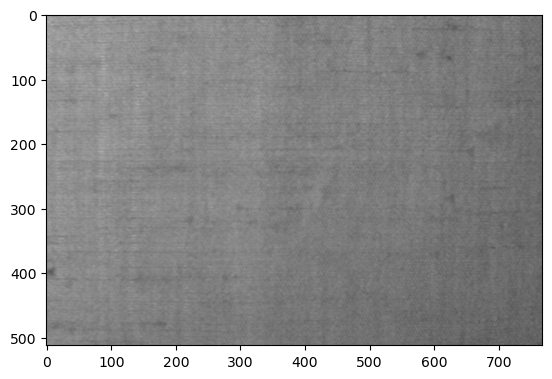

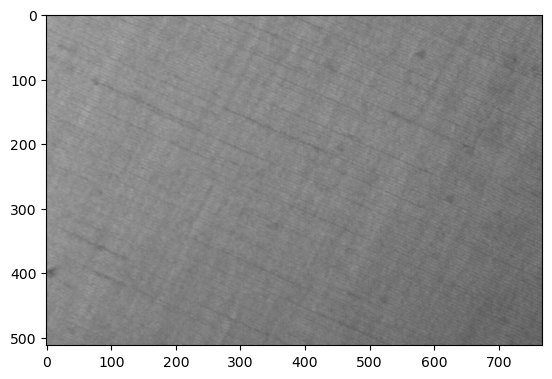

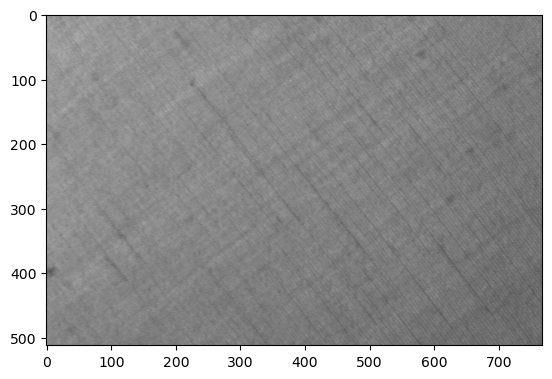

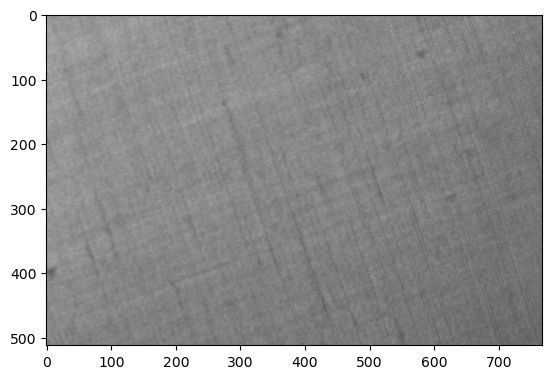

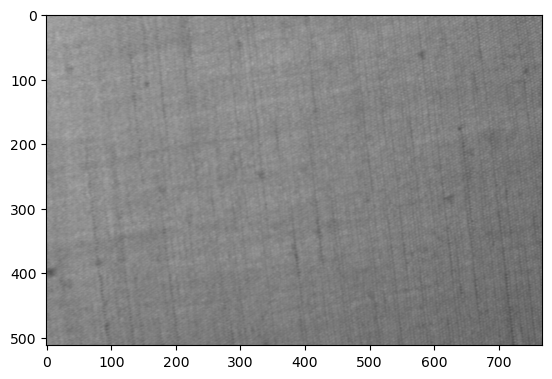

km_label:  1


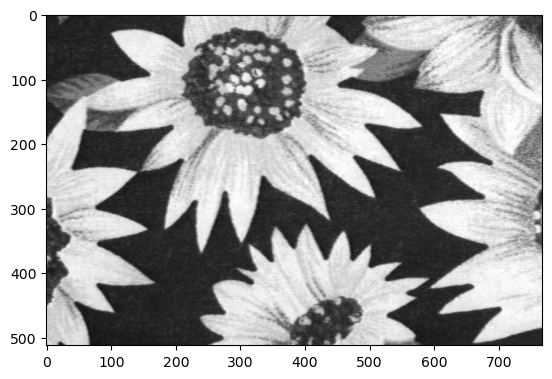

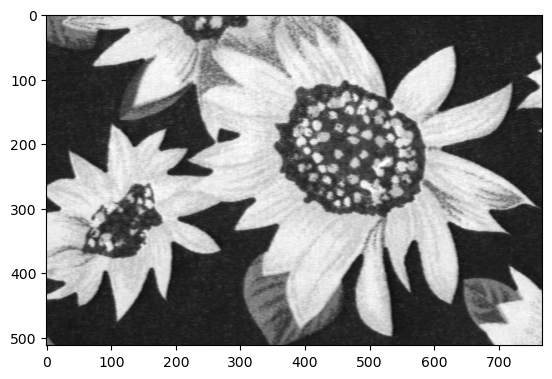

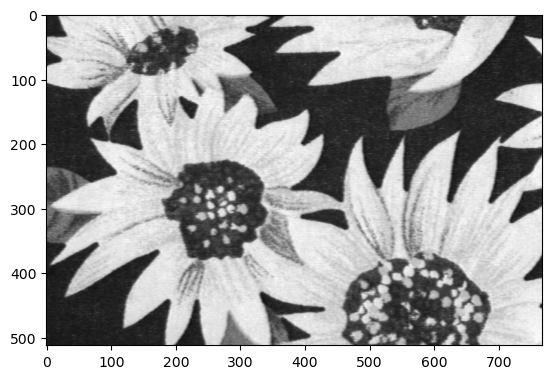

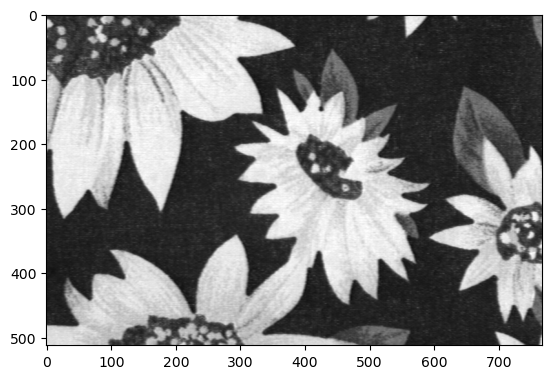

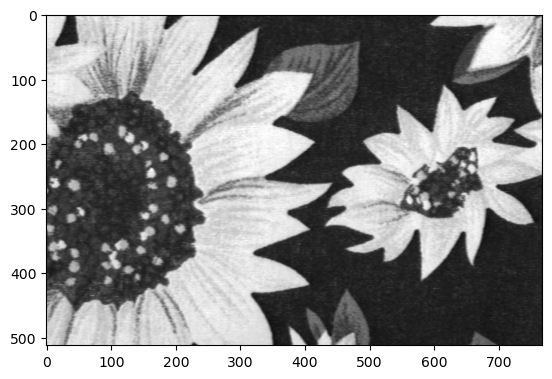

km_label:  2


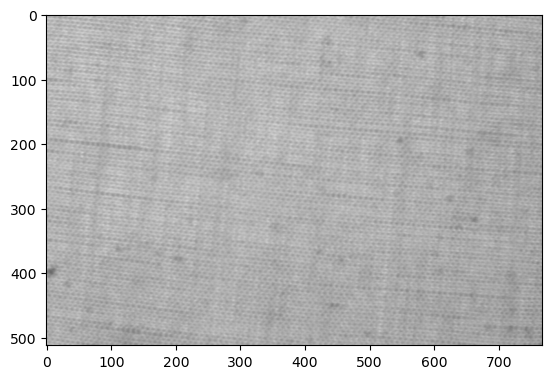

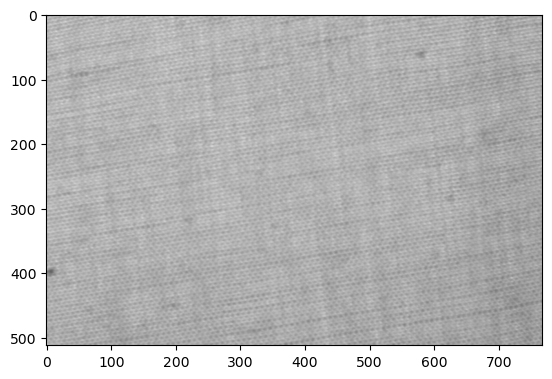

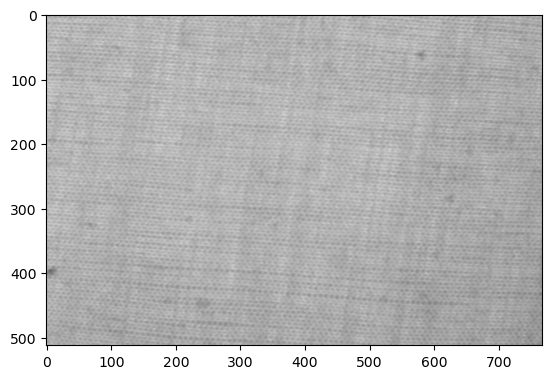

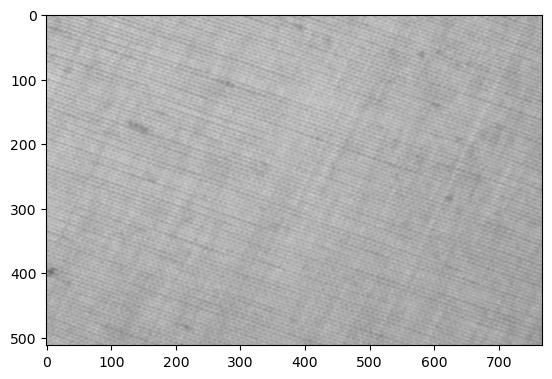

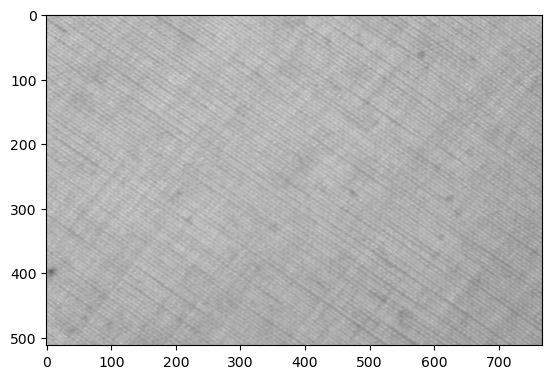

km_label:  3


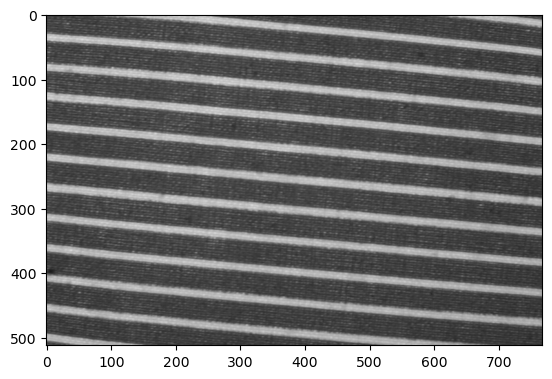

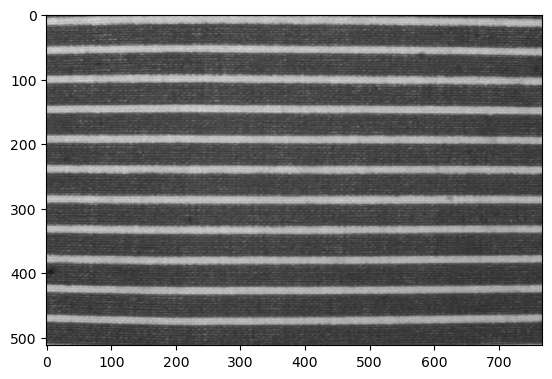

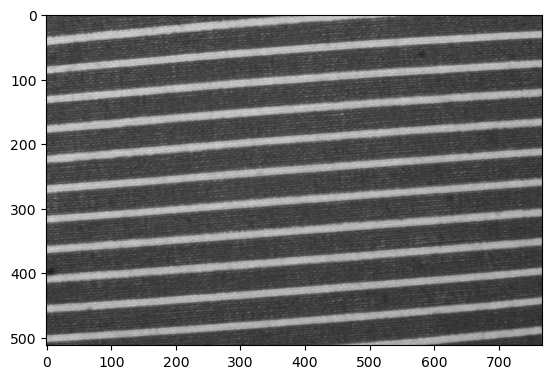

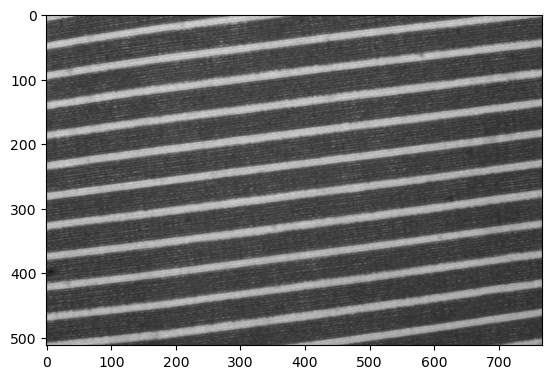

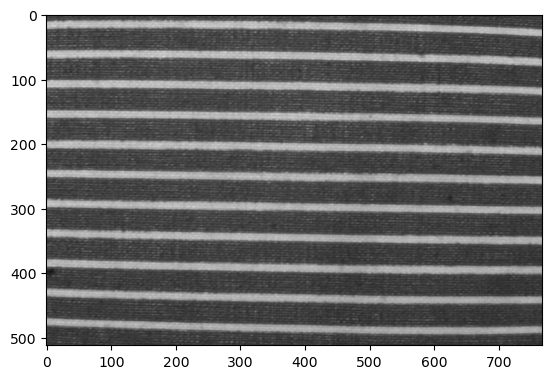

km_label:  4


In [21]:
#Now to roughly check how it classified we can visualize the first 10 images of each cluster
for i in range(5):
    cluster_ex = df[(df["km_label"]==i) & (df["e"]==0)][33:38].paths
    print("km_label: ",i)
    for pth in cluster_ex:
        image = cv2.imread(pth)
        plt.imshow(image)
        plt.show()

- KNN:

In [43]:
images_train = []
labels_train = []
images_test = []
labels_test = []
X_train, X_test, y_train, y_test = train_test_split(df, df, test_size=0.33, random_state=42)
for i, row in X_train.iterrows():
    img = cv2.cvtColor(cv2.imread(row["paths"]), cv2.COLOR_BGR2GRAY)
    img = img[:300,:300]
    (thresh, bin) = cv2.threshold(crop, 170, 180, cv2.THRESH_BINARY)
    img = bin.flatten()
    images_train.append(img)
    labels_train.append(row["patter_idx"]) #filter first unwanted cols and append

for i, row in X_test.iterrows():
    img = cv2.cvtColor(cv2.imread(row["paths"]), cv2.COLOR_BGR2GRAY)
    img = img[:300,:300]
    (thresh, bin) = cv2.threshold(crop, 170, 180, cv2.THRESH_BINARY)
    img = bin.flatten()
    images_test.append(img)
    labels_test.append(row["patter_idx"]) #filter first unwanted cols and append

images_train = np.array(images_train)
images_test = np.array(images_test)
labels_train = np.array(labels_train)
labels_test = np.array(labels_test)

In [56]:
images_train

array([[180, 180, 180, ..., 180, 180, 180],
       [180, 180, 180, ..., 180, 180, 180],
       [180, 180, 180, ..., 180, 180, 180],
       ...,
       [180, 180, 180, ..., 180, 180, 180],
       [180, 180, 180, ..., 180, 180, 180],
       [180, 180, 180, ..., 180, 180, 180]], dtype=uint8)

In [57]:
labels_train

array([3, 1, 7, ..., 2, 3, 2])

In [58]:
labels_test

array([7, 2, 3, ..., 2, 2, 1])

In [53]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(images_train, labels_train)

KNeighborsClassifier(n_neighbors=15)

In [54]:
neigh.score(images_test,labels_test)

0.13763233878729547

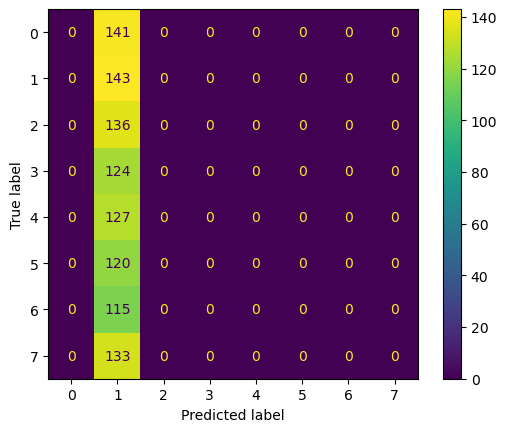

In [55]:
cm = confusion_matrix(labels_test, neigh.predict(images_test), labels=neigh.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()